<a href="https://colab.research.google.com/github/ZacharyArmandNEU/DS5020/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zachary Armand;
DS 5020;
Homework 3;
2/15/23

# Question 5 - Real Estate Least Squares Regression

Set up csv and x, y, and z values to be used throughout the question

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# get csv from github repo
url = 'https://raw.githubusercontent.com/ZacharyArmandNEU/DS5020/main/Real%20estate.csv'
csv = np.loadtxt(url, skiprows=1, delimiter=',')

In [35]:
# extract columns to vectors
y = np.array(csv[:,7]) # price
x = np.array(csv[:,2]) # age
z = np.array(csv[:,3]) # dist to MRT station

# filter array to remove lone outlier from Price
y_out = np.where(y == 117.5)[0][0] #outlier value already established
# save as new arrays
x = np.delete(x, y_out)
y = np.delete(y, y_out)
z = np.delete(z, y_out)

# length of y, x
yn = len(y)
xn = len(x)

# Part A - Predict Y (price) using house age.

Technique for getting A attributed to https://www.statology.org/numpy-least-squares-fit/

In [36]:
# get A 
A = np.vstack([np.ones(len(x)), x]).T
# coefficients
C, D = np.linalg.lstsq(A, y, rcond=None)[0]

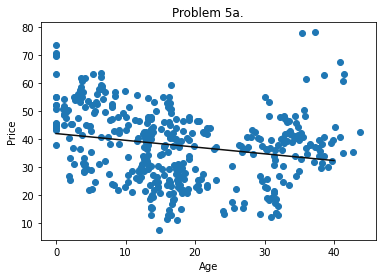

In [37]:
# plot points
plt.scatter(x[:], y[:])
plt.title("Problem 5a.")
plt.xlabel("Age")
plt.ylabel("Price")

# plot line
xi = np.linspace(0, 40)
plt.plot(xi, C + D*xi, c='#0f0f0f')

In [38]:
# predicting prices using the line of best fit
brand_new_price = C + D*0
print(f"Brand new house price: {brand_new_price:.2f}")
twenty_five_price = C + D*25
print(f"25 year old house price: {twenty_five_price:.2f}")
fourty_price = C + D*40
print(f"40 year old house price: {fourty_price:.2f}")

Brand new house price: 42.07
25 year old house price: 36.03
40 year old house price: 32.41


# Part B - Predict Y (price) using two features.

In [39]:
# set up A
Ab = np.vstack([A.T, z]).T
# solve least squares - get coefficients
Cb, Db, Eb = np.linalg.lstsq(Ab, y, rcond=None)[0]

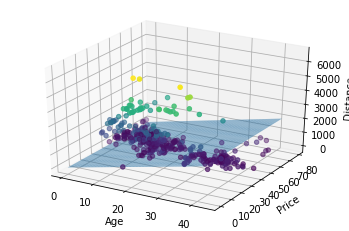

In [40]:
# plotting
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Data for three-dimensional scattered points
ax.scatter3D(x, y, z, c=z) # color is z value

# set labels
ax.set_xlabel('Age')
ax.set_ylabel('Price')
ax.set_zlabel('Distance')

# gather max values for x and y
max_x = int(max(x))
max_y = int(max(y))

# get x and y plane values
xx, yy = np.meshgrid(range(max_x), range(max_y))

# get z plane values
zz = (Cb*xx + Db*yy + Eb)

# actually plot
ax.plot_surface(xx, yy, zz, alpha=0.5)

In [41]:
# predicting prices using the plane of best fit
xyz_brandnew = Cb + Db*0 + Eb*0
print(f"Brand new house price on MRT station: {xyz_brandnew:.2f}")
xyz_brandnew_far = Cb + Db*0 + Eb*2500
print(f"Brand new house price far from station: {xyz_brandnew_far:.2f}")
xyz_twofive = Cb + Db*25 + Eb*0
print(f"25 year old house price on MRT station: {xyz_twofive:.2f}")
xyz_twofive_far = Cb + Db*25 + Eb*100
print(f"25 year old house price far from station: {xyz_twofive_far:.2f}")

Brand new house price on MRT station: 49.45
Brand new house price far from station: 31.66
25 year old house price on MRT station: 43.90
25 year old house price far from station: 43.19
